# Charlotte Bate - Research Computing PS5

In [263]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1) Use Pandas’ read_csv function directly on this URL to open it as a DataFrame

In [264]:
# Display the first few rows and the DataFrame info.

In [265]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [266]:
df.info() # 'time' type not datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


## 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

In [267]:
df = pd.read_csv('http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv', parse_dates=[0])
df = df.set_index(['id'])

In [268]:
# Verify that this worked using the head and info functions.

In [269]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   time       120108 non-null  datetime64[ns]
 1   latitude   120108 non-null  float64       
 2   longitude  120108 non-null  float64       
 3   depth      120107 non-null  float64       
 4   mag        120065 non-null  float64       
 5   magType    120065 non-null  object        
 6   nst        59688 non-null   float64       
 7   gap        94935 non-null   float64       
 8   dmin       85682 non-null   float64       
 9   rms        119716 non-null  float64       
 10  net        120108 non-null  object        
 11  updated    120108 non-null  object        
 12  place      120108 non-null  object        
 13  type       120108 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 13.7+ MB


In [271]:
# 'time' type is datetime and id is used as index now!

## 3) Use describe to get the basic statistics of all the columns

In [272]:
# Note the highest and lowest magnitude of earthquakes in the database.

In [273]:
df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [274]:
print(df.mag.max())
print(df.mag.min())

8.2
-0.97


## 4) Use nlargest to get the top 20 earthquakes by magnitude

In [275]:
df.mag.nlargest(n=20) # top 20 magnitude earthquakes identified by their 'id'

id
usc000nzvd    8.2
usc000rki5    7.9
usc000p27i    7.7
usc000phx5    7.6
usb000pr89    7.5
usc000piqj    7.4
usb000slwn    7.3
usb000pq41    7.2
usc000pft9    7.1
usc000sxh8    7.1
usc000stdc    7.1
usb000sk6k    7.0
usc000mnvj    6.9
usc000nzwm    6.9
usb000r2hc    6.9
usc000rngj    6.9
usc000rkg5    6.9
usb000ruzk    6.9
usc000rr6a    6.9
usb000rzki    6.9
Name: mag, dtype: float64

## 5) Extract the state or country using Pandas text data functions

In [276]:
# Add it as a new column to the dataframe called country. Note that some of the “countries” are actually U.S. states.

In [277]:
ctry = df.place.str.split(", ").str.get(1)
ctry

id
ak11155107        Alaska
nn00436847        Nevada
ak11151142        Alaska
ak11151135        Alaska
ci37171541        Mexico
                 ...    
ak11453391        Alaska
ak11453395        Alaska
nc72358451    California
ak11453390        Alaska
ak11453389        Alaska
Name: place, Length: 120108, dtype: object

In [278]:
country = pd.Series(ctry, index=df.index, name='country')
country

id
ak11155107        Alaska
nn00436847        Nevada
ak11151142        Alaska
ak11151135        Alaska
ci37171541        Mexico
                 ...    
ak11453391        Alaska
ak11453395        Alaska
nc72358451    California
ak11453390        Alaska
ak11453389        Alaska
Name: country, Length: 120108, dtype: object

In [279]:
df = df.join(country)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,Alaska
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,Nevada
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,Alaska
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,Alaska
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


## 6) Display each unique value from the new column

In [280]:
df.country.unique()

array(['Alaska', 'Nevada', 'Mexico', 'California', 'Papua New Guinea',
       'New Zealand', 'Missouri', nan, 'Montana',
       'British Virgin Islands', 'Washington', 'Oregon', 'Canada', 'Fiji',
       'Antarctica', 'Chile', 'Utah', 'Indonesia', 'Solomon Islands',
       'Micronesia', 'Oklahoma', 'Hawaii', 'Wyoming', 'Russia', 'Arizona',
       'Philippines', 'Bolivia', 'Greece', 'Japan', 'Puerto Rico', 'Iran',
       'Tonga', 'Wallis and Futuna', 'Colorado', 'Guam', 'CA', 'Idaho',
       'Pakistan', 'Burma', 'China', 'Peru', 'Costa Rica', 'East Timor',
       'Japan region', 'Northern Mariana Islands', 'El Salvador', 'Samoa',
       'Taiwan', 'Arkansas', 'South Sandwich Islands', 'Colombia',
       'Dominican Republic', 'Argentina', 'Texas', 'New Hampshire',
       'Saint Helena', 'Tanzania', 'Vanuatu', 'Bosnia and Herzegovina',
       'India', 'American Samoa', 'Tennessee', 'Kentucky', 'Serbia',
       'Nicaragua', 'Republic of the Congo', 'U.S. Virgin Islands', '',
       'Guatemal

## 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger

In [281]:
df4 = df[df.mag >= 4]
df4

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mqlp,2014-01-31 23:08:03.660,-4.9758,153.9466,110.18,4.2,mb,NaN,98.0,1.940,0.61,us,2014-04-08T01:43:19.000Z,"115km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
usc000mqln,2014-01-31 22:54:32.970,-28.1775,-177.9058,95.84,4.3,mb,NaN,104.0,1.063,1.14,us,2014-04-08T01:43:19.000Z,"120km N of Raoul Island, New Zealand",earthquake,New Zealand
usc000mqls,2014-01-31 22:49:49.740,-23.1192,179.1174,528.34,4.4,mb,NaN,80.0,5.439,0.95,us,2014-04-08T01:43:19.000Z,South of the Fiji Islands,earthquake,NaN
usc000mf1x,2014-01-31 22:19:44.330,51.1569,-178.0910,37.50,4.2,mb,NaN,NaN,NaN,0.83,us,2014-04-08T01:43:19.000Z,"72km E of Amatignak Island, Alaska",earthquake,Alaska
usc000mqlm,2014-01-31 21:56:44.320,-4.8800,153.8434,112.66,4.3,mb,NaN,199.0,1.808,0.79,us,2014-04-08T01:43:19.000Z,"100km ESE of Taron, Papua New Guinea",earthquake,Papua New Guinea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usc000t6yh,2014-12-01 02:56:07.950,21.2031,143.5484,11.05,4.4,mb,NaN,107.0,5.996,0.87,us,2015-02-24T00:35:14.040Z,"158km WNW of Farallon de Pajaros, Northern Mar...",earthquake,Northern Mariana Islands
usc000t6y2,2014-12-01 01:50:23.380,-7.8798,106.4275,52.10,4.3,mb,NaN,119.0,1.412,1.50,us,2015-02-24T00:35:14.040Z,"57km SSW of Cibungur, Indonesia",earthquake,Indonesia
usc000t6y1,2014-12-01 01:04:17.890,7.1429,126.8844,176.67,4.3,mb,NaN,134.0,1.297,0.87,us,2015-02-24T00:35:14.040Z,"37km ESE of Santiago, Philippines",earthquake,Philippines


## 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

In [282]:
# Location name on the x axis, Earthquake count on the y axis

In [283]:
countryCounts = df4["country"].value_counts()
countryCounts

country
Indonesia           2112
Papua New Guinea    1354
Japan               1150
Chile               1119
New Zealand          758
                    ... 
Jordan                 1
American Samoa         1
Russia region          1
Burundi                1
Arizona                1
Name: count, Length: 165, dtype: int64

Text(0, 0.5, 'Earthquake count')

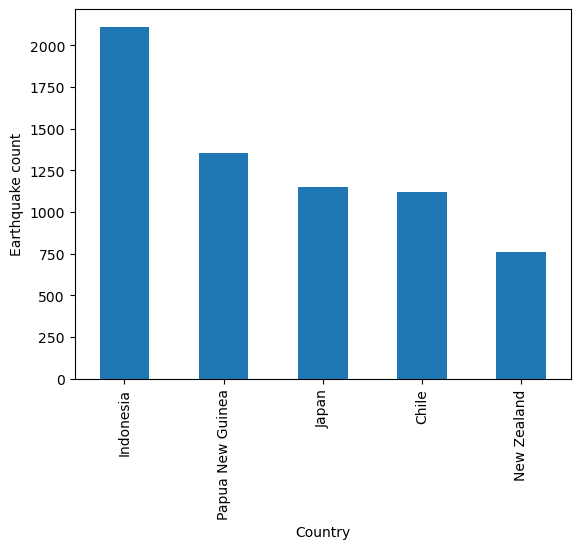

In [289]:
ax = countryCounts.nlargest(n=5).plot(kind='bar')
ax.set_xlabel("Country")
ax.set_ylabel("Earthquake count")

## 9) Make a histogram of the distribution of the Earthquake magnitudes

In [290]:
# Do one subplot for the filtered and one for the unfiltered dataset. 
# Use a Logarithmic scale. What sort of relationship do you see?

Text(0, 0.5, 'Frequency')

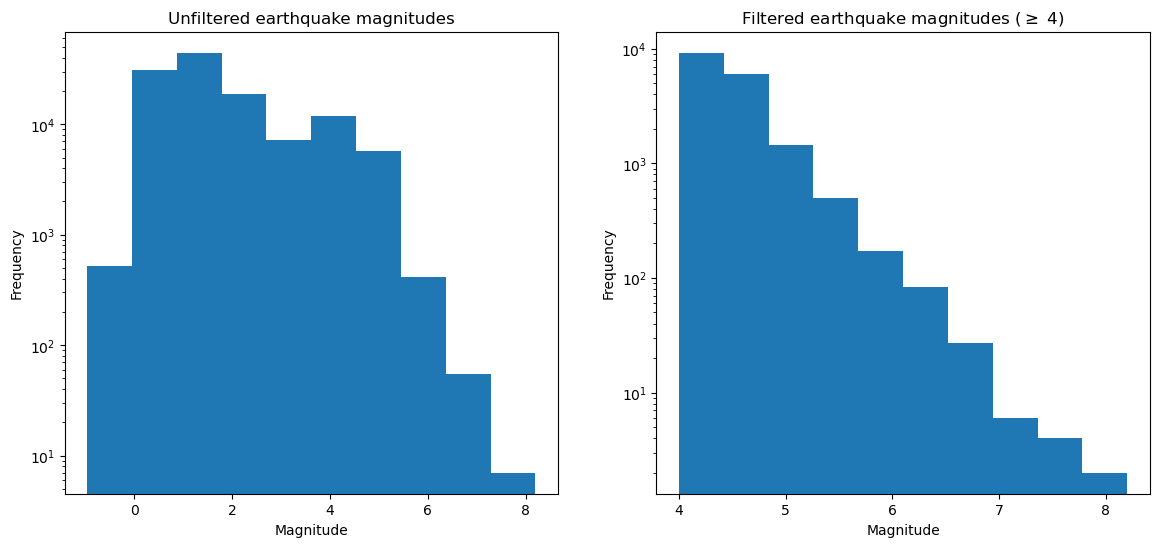

In [291]:
fig, ax = plt.subplots(ncols=2,figsize=(14,6))
ax[0].hist(df.mag, log=True)
ax[0].set_title('Unfiltered earthquake magnitudes')
ax[0].set_xlabel('Magnitude')
ax[0].set_ylabel('Frequency')

ax[1].hist(df4.mag, log=True)
ax[1].set_title('Filtered earthquake magnitudes ($\geq$ 4)')
ax[1].set_xlabel('Magnitude')
ax[1].set_ylabel('Frequency')

In [292]:
# The filtered earthquake magnitude frequencies are linear on a log scale, so the frequencies of magnitudes >=4 
# follow a logarithmic relationship with their respective magnitudes. This does not appear to be the case for magnitudes <4.

## 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

In [293]:
# Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty.
# What difference do you note between the filtered and unfiltered datasets?

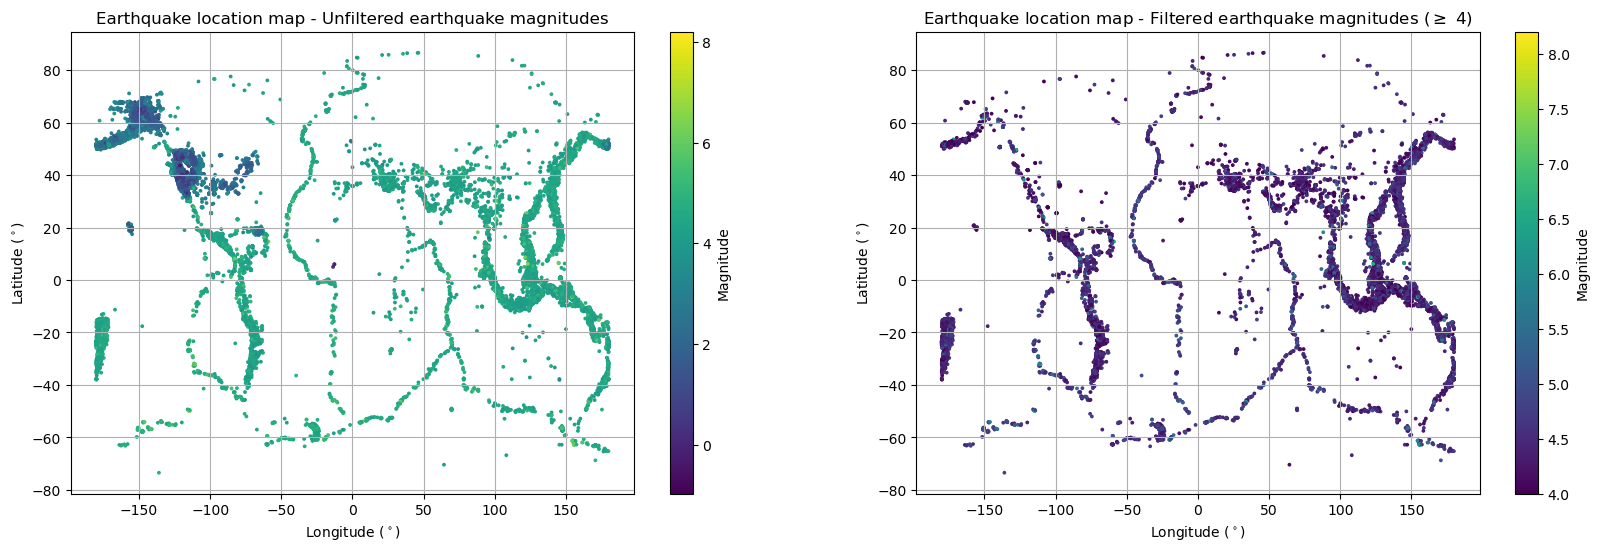

In [294]:
fs = 3 # font size

fig, ax = plt.subplots(ncols=2,figsize=(20,6))
sp0 = ax[0].scatter(df.longitude, df.latitude, c=df.mag, s=fs)
cb0 = fig.colorbar(sp0)
ax[0].set_title('Earthquake location map - Unfiltered earthquake magnitudes')
ax[0].set_xlabel('Longitude ($^\circ$)')
ax[0].set_ylabel('Latitude ($^\circ$)')
ax[0].grid()
cb0.set_label(label='Magnitude')

sp1 = ax[1].scatter(df4.longitude, df4.latitude, c=df4.mag, s=fs)
cb1 = fig.colorbar(sp1)
ax[1].set_title('Earthquake location map - Filtered earthquake magnitudes ($\geq$ 4)')
ax[1].set_xlabel('Longitude ($^\circ$)')
ax[1].set_ylabel('Latitude ($^\circ$)')
ax[1].grid()
cb1.set_label(label='Magnitude')

In [296]:
# Most earthquakes around the world are present in both the unfiltered and filtered datasets, except for most North American
# earthquakes: these tend to be of magnitudes lower than 4, so are filtered out of the filtered dataset.